# Binary classification notebook suggested solutions

<Axes: >

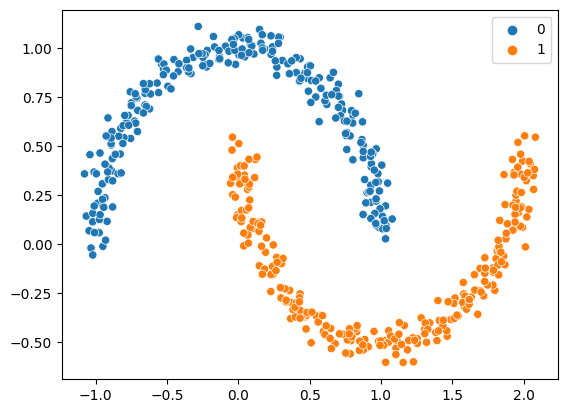

In [1]:
# the two moons dataset is a popular toy binary classification dataset
from sklearn.datasets import make_moons
import seaborn as sns
# scenario 1: fairly clean dataset
X, y = make_moons(n_samples=500, noise=0.05, random_state=42) # DO NOT change this line
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) # DO NOT change this line

In [3]:
# I(carson) vibe-coded this visualization pipeline up with deepseek, feel free to use AI tools when you do slightly complicated visualizations or
# pipelines like this, it is allowed in the competitions
# you do need to understand what it's writing and receiving though, to make quick changes (I made quite a few quick changes to make the plots visually better)
# and debug the processes effectively.

# in the selection there will be a manual python-writing round where there will be no LLMs to support you, and in the international competition they would not
# want the AI tools to give you every conceptual idea for the tasks.
def visualize_model():
    plt.figure(figsize=(5, 4))
    # Plot the training data
    scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='winter', edgecolors='k', s=50, alpha=0.6, label='Training Data')
    legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
    plt.gca().add_artist(legend1)
    # Use DecisionBoundaryDisplay to plot the decision boundary
    # This is the modern, clean method introduced in scikit-learn 1.1
    DecisionBoundaryDisplay.from_estimator(
        model,
        X_train,
        plot_method="contourf",
        alpha=0.7,
        ax=plt.gca(),
    )
    # Also add the decision boundary as a solid line
    DecisionBoundaryDisplay.from_estimator(
        model,
        X_train,
        plot_method="contour",
        levels=[0], # This plots the line where the decision function is 0
        linestyles=["--"],
        linewidths=2,
        colors='k', # Black line
        ax=plt.gca(),
    )
    # Add labels and title
    plt.grid(True, alpha=0.3)
    plt.show()
def evaluate_model(y_train, train_preds, y_val, val_preds, visualize=True):
    print("Training dataset classification report:")
    print(classification_report(y_train, train_preds))
    print(confusion_matrix(y_train, train_preds))
    print("Validation classification report:")
    print(classification_report(y_val, val_preds))
    print(confusion_matrix(y_val, val_preds))
    if visualize == True:
      visualize_model()

# Part 1: Train an SVM model

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training dataset classification report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       207
           1       1.00      0.63      0.77       193

    accuracy                           0.82       400
   macro avg       0.87      0.81      0.81       400
weighted avg       0.87      0.82      0.81       400

[[207   0]
 [ 72 121]]
Validation classification report:
              precision    recall  f1-score   support

           0       0.62      1.00      0.77        43
           1       1.00      0.54      0.70        57

    accuracy                           0.74       100
   macro avg       0.81      0.77      0.74       100
weighted avg       0.84      0.74      0.73       100

[[43  0]
 [26 31]]


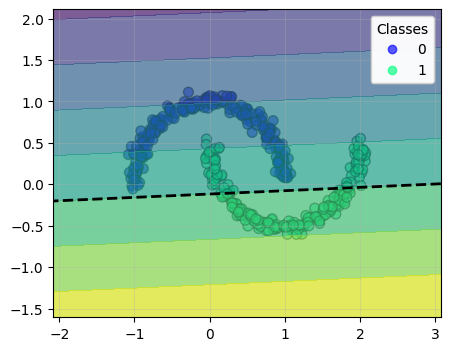

In [4]:
from sklearn.svm import LinearSVC # LinearSVC: linear SVM classifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
model = LinearSVC(C=1000.0) # try adjusting the C hyperparameter to see how it goes!
model.fit(X_train, y_train)
train_preds = model.predict(X_train)
preds = model.predict(X_val)
evaluate_model(y_train, train_preds, y_val, preds)

#Write your observations here:

The dataset (is not) linearly separable (remove the incorrect option)

For low C, the model performance decreases (for very low C).

For high C, the model performance decreases (for very high C).

# Part 2: Explore Different Choices of Kernels

Training dataset classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       207
           1       1.00      1.00      1.00       193

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

[[207   0]
 [  0 193]]
Validation classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        57

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

[[43  0]
 [ 0 57]]


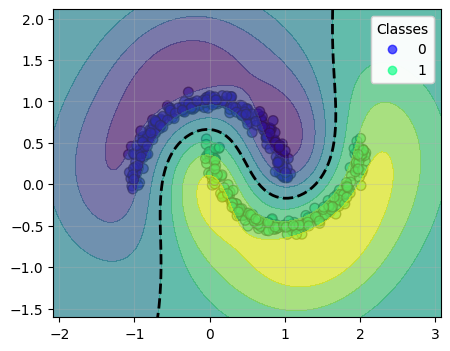

In [5]:
from sklearn.svm import SVC # SVC: SVM classifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
model = SVC(kernel='rbf') # this is the linear SVC
model.fit(X_train, y_train)
train_preds = model.predict(X_train)
preds = model.predict(X_val)
evaluate_model(y_train, train_preds, y_val, preds)
# try to change the 'kernel' hyperparameter to improve your validation scores!

# Write your observations here:

There are 4 kernels that are configured into the SVC by default. (If you're not sure which four see the documentation for the SVC in sklearn)

The linear kernel achieves a validation F1 score of 0.88

The poly kernel achieves a validation F1 score of 0.95

The sigmoid kernel achieves a validation F1 score of 0.64

The rbf kernel achieves a validation F1 score of 1.00

The best kernel for this setup is rbf.

# Part 3: Multi-class Classification

In [6]:
import pandas as pd
penguins = pd.read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/c19a904462482430170bfe2c718775ddb7dbb885/inst/extdata/penguins.csv")
penguins.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


<Axes: >

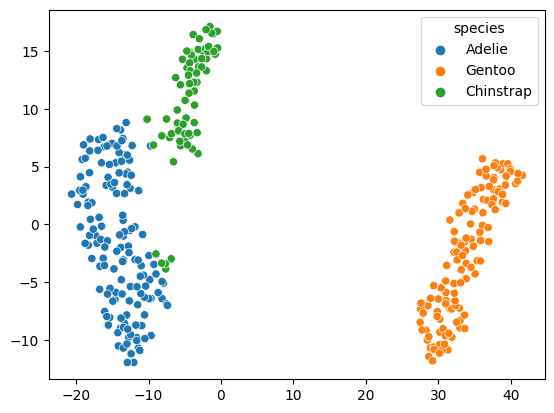

In [7]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
penguins = penguins.dropna() # drop rows with NaN values
X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
X_scaled = StandardScaler().fit_transform(X)
y = penguins['species']
tsne = TSNE()
pca = PCA(n_components=2)
# which one is better?
X_reduced = tsne.fit_transform(X_scaled)
#X_reduced = pca.fit_transform(X_scaled) # comment this line out to try the tsne
sns.scatterplot(x=X_reduced[:,0], y=X_reduced[:,1], hue=y)

# Write your observations here:

1. (TSNE) separates the dataset better. (remove the incorrect option). The reason is that TSNE can handle nonlinear dependencies in the data during the dimensionality reduction while the PCA cannot.

2. If you remove the standard scaling (done via StandardScaler) in the data preprocessing, the separation is (not very good). A possible reason is that the scales of the original features are different. Without scaling, some less important features might explain most of the data's variance because of their large scale alone.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) # DO NOT change this line

In [20]:
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import f1_score
import numpy as np
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = []
X = np.array(X_scaled) # convert everything to numpy array format first to avoid confusion in data processing later on
# also scaling might not be just important for neural networks, sometimes it might be important for other things as well
# because of numerical stability
# scikit-learn natively takes in np.array but not pd.DataFrame
for i, (train_idx, val_idx) in enumerate(cv.split(X)):
    X_train_fold, X_val_fold = X[train_idx], X[val_idx]
    y_train_fold, y_val_fold = y[train_idx], y[val_idx]
    model = LinearSVC(C=1, random_state=42, max_iter=1000)  # Added random_state for reproducibility
    model.fit(X_train_fold, y_train_fold)
    val_preds = model.predict(X_val_fold)
    scores.append(f1_score(y_val_fold, val_preds, average='macro'))
print(sum(scores) / len(scores))

0.9841978659067216


# Write your observations here

This F1 scoring scheme may not actually be the most rigorous. The reason is the F1 score is nonlinear, so the average of the F1 score for each fold is not equal to the actual F1 score when all fold predictions and all targets are concatenated together.

Suggest a better method for the model evaluation in the next code block.

In [21]:
# better evaluation method
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import f1_score
import numpy as np
cv = KFold(n_splits=5, shuffle=True, random_state=42)
preds = []
targets = []
scores = []
# YOUR CODE HERE
for i, (train_idx, val_idx) in enumerate(cv.split(X)):
    X_train_fold, X_val_fold = X[train_idx], X[val_idx]
    y_train_fold, y_val_fold = y[train_idx], y[val_idx]
    model = LinearSVC(C=1, random_state=42)  # Added random_state for reproducibility
    model.fit(X_train_fold, y_train_fold)
    val_preds = model.predict(X_val_fold)
    # YOUR CODE HERE
    preds.append(val_preds)
    targets.append(y_val_fold)
final_f1_score = f1_score(np.concatenate(targets), np.concatenate(preds), average='macro')
print(final_f1_score)

0.9855146038514908
